In [ ]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
if not Path("img").exists():
    Path("img").mkdir()
    print("Created img directory")

# Strong and Weak Scaling

In [3]:
strong_scaling_df = pd.read_csv('csv/strong_scaling.csv')
weak_scaling_df = pd.read_csv('csv/weak_scaling.csv')

In [4]:
strong_scaling_df['Average wct'] = strong_scaling_df.drop(columns=['p']).mean(axis=1)
weak_scaling_df['Average wct'] = weak_scaling_df.drop(columns=['p']).mean(axis=1)

In [5]:
strong_scaling_df['speedup'] = strong_scaling_df['Average wct'][0] / strong_scaling_df['Average wct']

In [6]:
strong_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,speedup
0,1,12.941009,12.846122,13.279885,13.124807,13.101260,13.058617,1.000000
1,2,6.531103,6.709235,6.821394,6.989430,6.562823,6.722797,1.942438
2,3,4.477018,4.637547,4.416162,4.471832,4.424010,4.485314,2.911416
3,4,3.386704,3.344937,3.566760,3.320402,3.289742,3.381709,3.861544
4,5,2.720429,2.768941,2.694452,2.661266,2.683466,2.705711,4.826316


In [7]:
strong_scaling_df['efficiency'] = strong_scaling_df['speedup'] / strong_scaling_df['p']

weak_scaling_df['efficiency'] = weak_scaling_df['Average wct'][0] / weak_scaling_df['Average wct']

In [8]:
strong_scaling_df.head(8)

,p,t1,t2,t3,t4,t5,Average wct,speedup,efficiency
0,1,12.941009,12.846122,13.279885,13.124807,13.101260,13.058617,1.000000,1.000000
1,2,6.531103,6.709235,6.821394,6.989430,6.562823,6.722797,1.942438,0.971219
2,3,4.477018,4.637547,4.416162,4.471832,4.424010,4.485314,2.911416,0.970472
3,4,3.386704,3.344937,3.566760,3.320402,3.289742,3.381709,3.861544,0.965386
4,5,2.720429,2.768941,2.694452,2.661266,2.683466,2.705711,4.826316,0.965263
5,6,2.321588,2.291439,2.249243,2.326216,2.351815,2.308060,5.657832,0.942972
6,7,2.068506,2.021430,1.966057,2.002504,2.171299,2.045959,6.382638,0.911805
7,8,1.785145,1.785186,1.725450,1.812531,1.787732,1.779209,7.339564,0.917445


In [9]:
weak_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,efficiency
0,1,13.097689,12.951720,13.160213,13.033412,13.031697,13.054946,1.000000
1,2,13.224467,13.850342,13.182265,13.127808,13.799785,13.436933,0.971572
2,3,13.619565,13.155775,13.421213,13.932746,14.130938,13.652047,0.956263
3,4,14.249534,14.142579,14.713179,14.518229,14.137901,14.352284,0.909608
4,5,13.687275,13.737280,14.177047,13.916366,14.154113,13.934416,0.936885


Plot the speedup with the theoretical linear speedup as a reference.

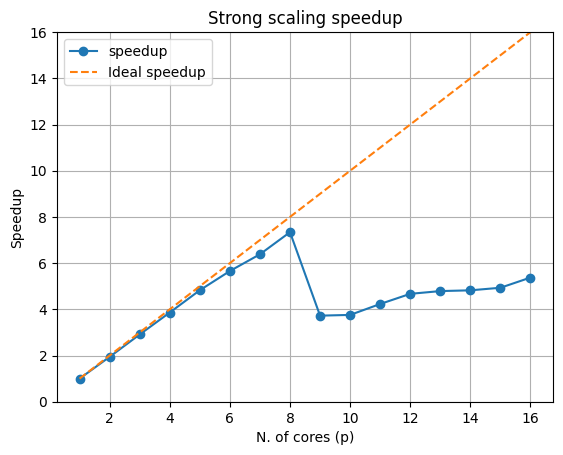

In [10]:
strong_scaling_df.plot(x='p', y='speedup', title='Strong scaling speedup', marker='o', ylim=(0, max(strong_scaling_df['p'])))
plt.plot(strong_scaling_df['p'], strong_scaling_df['p'], label='Ideal speedup', linestyle='--')
plt.xlabel('N. of cores (p)')
plt.ylabel('Speedup')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_speedup.svg', format='svg')
plt.show()

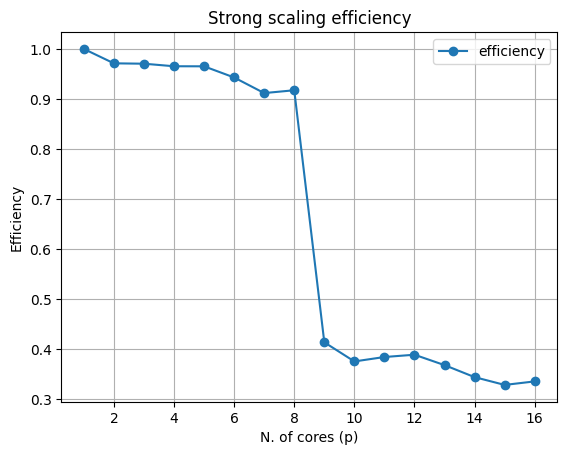

In [11]:
strong_scaling_df.plot(x='p', y='efficiency', title='Strong scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_efficiency.svg', format='svg')
plt.show()

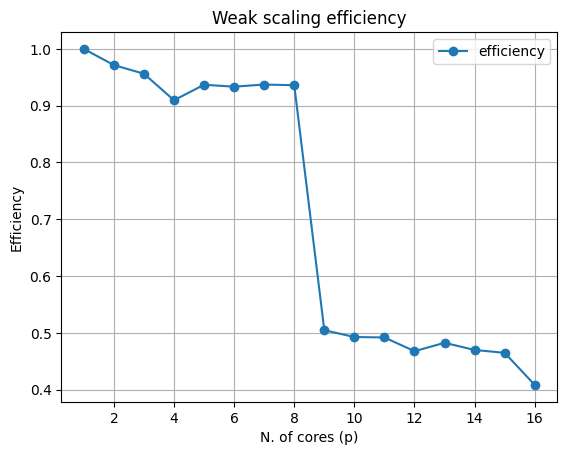

In [12]:
weak_scaling_df.plot(x='p', y='efficiency', title='Weak scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}weak_scaling_efficiency.svg', format='svg')
plt.show()

# CUDA Throughput

In [13]:
cuda_df = pd.read_csv('csv/cuda_perf1000.csv')

In [14]:
cuda_df.head()

,N,K,cpu_t1,cpu_t2,cpu_t3,cpu_t4,cpu_t5,gpu_t1,gpu_t2,gpu_t3,...,gpu_th1,gpu_th2,gpu_th3,gpu_th4,gpu_th5,gpu_th1_shared,gpu_th2_shared,gpu_th3_shared,gpu_th4_shared,gpu_th5_shared
0,131072,1000,0.505438,0.557469,0.505314,0.475398,0.429980,0.013097,0.005144,0.006511,...,9.921548e+09,2.525905e+10,1.995649e+10,2.690949e+10,2.699451e+10,5.752520e+10,5.652884e+10,5.701916e+10,5.713546e+10,5.643143e+10
1,262144,1000,0.769906,0.766133,0.752991,0.794971,0.805189,0.005655,0.005699,0.005723,...,4.613200e+10,4.578001e+10,4.558239e+10,4.530741e+10,4.691275e+10,8.354301e+10,8.178910e+10,8.194404e+10,8.262580e+10,8.308269e+10
2,524288,1000,1.354669,1.314706,1.328199,1.337025,1.248111,0.007709,0.007242,0.007324,...,6.781161e+10,7.218853e+10,7.137926e+10,6.925905e+10,7.009248e+10,1.112590e+11,1.104311e+11,1.099474e+11,1.108956e+11,1.104045e+11
3,1048576,1000,2.096384,2.320499,2.048667,2.192571,2.434352,0.009809,0.009730,0.009998,...,1.066897e+11,1.075615e+11,1.046697e+11,1.067742e+11,1.066238e+11,1.381100e+11,1.369657e+11,1.368035e+11,1.370442e+11,1.372910e+11
4,2097152,1000,4.229472,4.299219,4.014520,4.220380,5.159242,0.014686,0.014594,0.014685,...,1.425895e+11,1.434905e+11,1.426019e+11,1.331467e+11,1.424802e+11,1.581827e+11,1.586382e+11,1.589883e+11,1.584084e+11,1.579516e+11


In [15]:
cuda_df['CPU Average wct'] = cuda_df[['cpu_t1','cpu_t2','cpu_t3','cpu_t4','cpu_t5']].mean(axis=1)
cuda_df['GPU Average wct'] = cuda_df[['gpu_t1','gpu_t2','gpu_t3','gpu_t4','gpu_t5']].mean(axis=1)
cuda_df['GPU Average wct shared'] = cuda_df[['gpu_t1_shared','gpu_t2_shared','gpu_t3_shared','gpu_t4_shared','gpu_t5_shared']].mean(axis=1)

cuda_df['CPU Average throughput'] = cuda_df[['cpu_th1','cpu_th2','cpu_th3','cpu_th4','cpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput'] = cuda_df[['gpu_th1','gpu_th2','gpu_th3','gpu_th4','gpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput shared'] = cuda_df[['gpu_th1_shared','gpu_th2_shared','gpu_th3_shared','gpu_th4_shared','gpu_th5_shared']].mean(axis=1) / 1000000

cuda_df['Speedup'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct']
cuda_df['Speedup shared'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct shared']

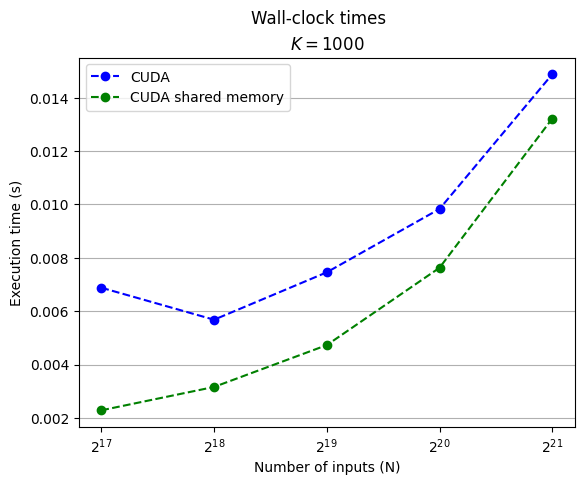

In [22]:
#plt.plot(cuda_df['N'], cuda_df['CPU Average wct'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Wall-clock times')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xscale('log', base=2)
plt.ylabel('Execution time (s)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_wct.svg', format='svg')
plt.show()

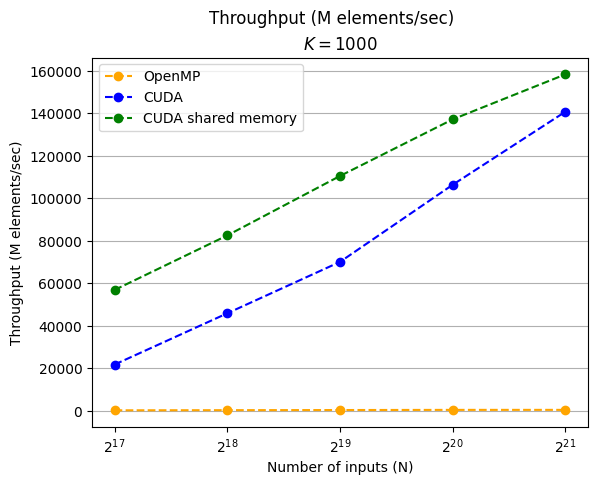

In [17]:
plt.plot(cuda_df['N'], cuda_df['CPU Average throughput'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Throughput (M elements/sec)')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xscale('log', base=2)
plt.ylabel('Throughput (M elements/sec)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_throughput.svg', format='svg')
plt.show()

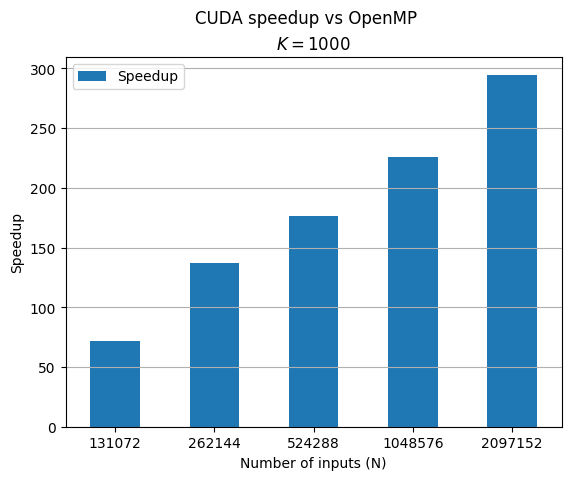

In [18]:
cuda_df.plot.bar(x='N', y='Speedup')
plt.suptitle('CUDA speedup vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup.svg', format='svg')
plt.show()

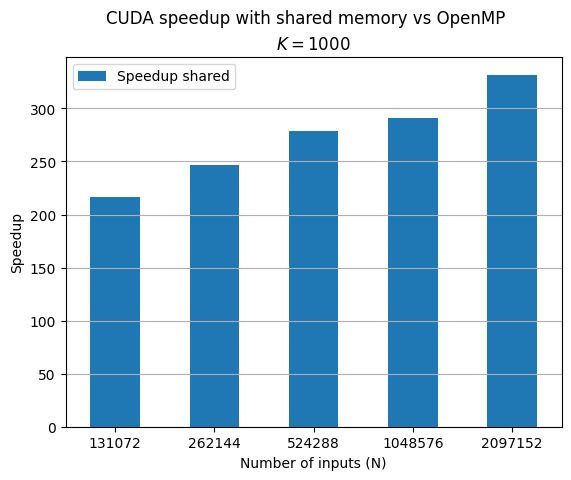

In [19]:
cuda_df.plot.bar(x='N', y='Speedup shared')
plt.suptitle('CUDA speedup with shared memory vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup_shared.svg', format='svg')
plt.show()

In [23]:
print(f"Speedup of CUDA for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup'].values[0]:.2f}")
print(f"Speedup of CUDA with shared memory for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup shared'].values[0]:.2f}")

Speedup of CUDA for N = 1048576: 225.67
Speedup of CUDA with shared memory for N = 1048576: 290.93
